<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Андрей, привет! Спасибо, что прислал работу во время :) 
    
Меня зовут Евгений, и я буду проверять твой проект) 
Ты проделал большую работу над проектом, однако в любом деле всегда можно можно что-то улучшить. Моя основная цель — не показать, что где—то совершены какие—либо ошибки, а поделиться своим опытом, который поможет тебе в дальнейших работах. Далее в файле ты сможешь увидить мои комментарии, постарайся учесть их при выполнении следующих заданий.    

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно; <font color=orange>оранжевый</font> - есть замечания, но не критично; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 

</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Можно также привести краткий план проведения самой работы.
</div>

### Часть 1. Обзор данных и исследование общей информации. 

In [102]:
# импорт библеотек 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
%matplotlib inline

In [2]:
# загрузка датасета в переменную df
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

- total_images — число фотографий квартиры в объявлении, int64
- last_price — цена на момент снятия с публикации, float64
- total_area — площадь квартиры в квадратных метрах (м²), float64
- first_day_exposition — дата публикации, object
- rooms — число комнат, int64
- ceiling_height — высота потолков (м), float64
- floors_total — всего этажей в доме, float64
- living_area — жилая площадь в квадратных метрах(м²), float64
- floor — этаж, int64
- is_apartment — апартаменты (булев тип), object
- studio — квартира-студия (булев тип), bool
- open_plan — свободная планировка (булев тип), bool
- kitchen_area — площадь кухни в квадратных метрах (м²), float64
- balcony — число балконов, float64
- locality_name — название населённого пункта, object
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м), float64
- cityCenters_nearest — расстояние до центра города (м), float64
- parks_around3000 — число парков в радиусе 3 км, float64
- parks_nearest — расстояние до ближайшего парка (м), float64
- ponds_around3000 — число водоёмов в радиусе 3 км, float64
- ponds_nearest — расстояние до ближайшего водоёма (м), float64
- days_exposition — сколько дней было размещено объявление (от публикации до снятия), float64











In [5]:
# проверка на наличие дубликатов 
df.duplicated().sum()

0

In [6]:
# проверка на ниличие пропущенных значений
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
# проверим наличие аномальных значений в датасете
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [8]:
df.describe(include='object')

,first_day_exposition,is_apartment,locality_name
count,23699,2775,23650
unique,1491,2,364
top,2018-02-01T00:00:00,False,Санкт-Петербург
freq,368,2725,15721


In [9]:
# проверим названия населнных пунктов
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [10]:
# выведем количество населенных пунктов 
df['locality_name'].value_counts()

Санкт-Петербург                  15721
посёлок Мурино                     522
посёлок Шушары                     440
Всеволожск                         398
Пушкин                             369
                                 ...  
посёлок Коробицыно                   1
деревня Пельгора                     1
поселок Пансионат Зелёный Бор        1
посёлок Высокоключевой               1
посёлок Мыза-Ивановка                1
Name: locality_name, Length: 364, dtype: int64

### Вывод

1) В датасете всего 23699 строки и 22 столбца.

2) Много пропущенных значений, которые необходимо заполнить или выделить их аномальными зачениями, чтобы не потерять другие данные.

3) Отрицательных значений нет, но есть значения, которые  сильно выделяются на фоне других, например высота потолка 100 м и 1 метр или площадь квартиры 900 м².

4) Преобразование типа данных:
- first_day_exposition необходимо преобразовать в datatime.
- floors_total преобразовать из float64 в int64 (количественные данные оцениваются целочисленно).
- is_apartment преобразовать из object в bool (исходные данные говорят о том что это булев тип).
- balcony преобразовать из float64 в int64 (количественные данные оцениваются целочисленно).
- parks_around3000 преобразовать из float64 в int64 (количественные данные оцениваются целочисленно).
- ponds_around3000 преобразовать из float64 в int64 (количественные данные оцениваются целочисленно).
- days_exposition преобразовать из float64 в int64 (количественные данные оцениваются целочисленно).

5) В locality_name, используется буква е и ё, что может привести к созданию названий, которые имеют одинаковую смысловую нагрузку, необходимо привести все к букве е.

## Часть 2. Предобработка данных

### Обработка столбца 'balcony'

In [11]:
# Исходим из того, что пропущенные значения в данном столбце не были указаны из-за их отсуствия,
# поэтому присвоим значениям NaN 0 и приведем к формату int64
df['balcony'] = df['balcony'].fillna(0).astype('int')
df['balcony'].isna().sum()


0

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Здорорво, что делаем сцепку методов. 

</div>

In [12]:
df['balcony'].dtypes 

dtype('int64')

### Обработка столбца 'locality_name'

In [13]:
# заменим буквы ё на е
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [14]:
# замена оказала свой эффект уникальных значений вместо 364 стало 330
len(df['locality_name'].value_counts())

330

In [15]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Свирьстрой',
       'городской поселок Советский', 'городской поселок Фед

In [16]:
# присвоим безымянным локациям "Санкт-Петербург" потому что в любом случае мы анализруем эту область
df['locality_name'].fillna(df['locality_name'].value_counts().idxmax())

0            Санкт-Петербург
1             поселок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23699, dtype: object

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Я бы рекомендовал не использовать атрибут `inplace`, так как в последующих обновлениях библотеки `pandas` он будет удален.
</div>

## Обработка столбца 'is_apartment'

In [17]:
#Проверим соотношение недвижемости, которая относится к апартоментам
df['is_apartment'].value_counts()/df['is_apartment'].value_counts().sum()

False    0.981982
True     0.018018
Name: is_apartment, dtype: float64

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Интересный способ определить долю каждого значения. 
    
В том числе мы можем использовать атрибут `normalize=True`, для того чтобы посчитать долю каждого значения в столбце. 
</div>

Количество недвижимости, которая относится к апартоментам очень низка ~0,02%, из открытых источников информации можно понять, что процент данного вида владения очень мал на рынке, ввиду большого количества ограничений, которые налагаются на эту собственность (например, ограничения по возможности регистрации). По этой причине отсуствующие данные можно заменить на False, даже если среди всех отсуствующих данных, есть апартаменты влияния на дальнейший анализ это не окажет, потому что эта аналитика является второстипенной и в анализе не используется


In [18]:
df['is_apartment'] = df['is_apartment'].fillna(False).astype('bool')
df['is_apartment'].isna().sum()

0

In [19]:
df['is_apartment'].dtypes

dtype('bool')

## Обработка столбца 'floors_total'

In [20]:
df['floors_total'].isna().sum()

86

In [21]:
#предположим что общее количество этажей равно указанному этажу расположения, поэтому это значение не было заполнено
df['floors_total'] = df['floors_total'].fillna(df['floor']).astype('int')

## Обработка столбцов связанных с инфраструрой

Из-за того что объявления с продажами связанны с конкретными локациями, отсуствующие значения в столбцах airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, можно заменить медианными значениями, инфраструктура которых нам известна, для того что бы не потерять остальные данные         


In [22]:
# создадим функцию которая группирует датафрейм по заданному столбцу и заполняет столбец по нужным значениям
def fill_NA(df,groupby,columns,func):
    if not isinstance(columns,list):
        raise ValueError('Need to be a list')
    df = df.copy()
    for col in columns:
        df[col] = df.groupby(groupby)[col].apply(lambda x: x.fillna(func(x)))
        df[col] = df[col].fillna(0).round()
    return df

In [23]:
# замена медианными значениями
columns_to_fill = ['airports_nearest','cityCenters_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest']
df = fill_NA(df,'locality_name',columns_to_fill,np.mean)

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Интересный способ заменить пропуски. 
    
</div>

In [24]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9195
floors_total               0
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2278
balcony                    0
locality_name             49
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64

In [25]:
'''к расстоянию и количеству парков и водоемов для дальнейшего анализа переведем в формат int, расстояние выраженно
в метрах поэтому, доли метров(сантиметры) в этой ситуации значительного влияния не окажут'''
df[columns_to_fill]=df[columns_to_fill].astype('int')


## Обработка столбцов 'kitchen_area', 'living_area'  и 'ceiling_height' 

Для начала построим матрицу кариляции для 4-х стобцов, тк мы оцениваем площадь, проверим есть ли взаимосвязь между общей площадью, количеством комнат, жилой площадью и площадью кухни

In [26]:
flat_area = ['total_area', 'rooms', 'living_area','kitchen_area']

Text(0.5, 0.98, 'Scatter-matrix')

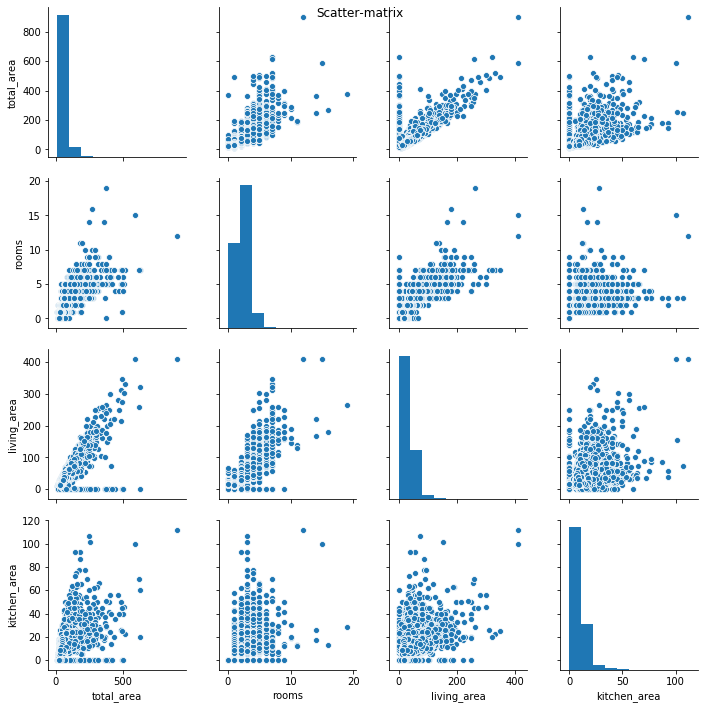

In [108]:
sns.pairplot(df[flat_area]);
plt.suptitle('Scatter-matrix')

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Не забывай пожалуйста подписывать каждый график. Это важный момент каждого проекта. Так быстрее понять о чем идет речь на построенном графике. 

</div>

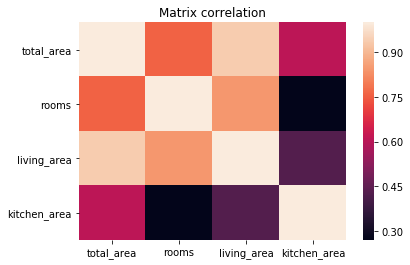

In [28]:
sns.heatmap(df[flat_area].corr());
plt.title('Matrix correlation');

Из анализа корреляции можно выделить следующее: 

- ярко выраженная взаимосязь между жилой зоной общей площадью и общей площадью, коэф. корреляции 0,93
- ярко выраженная взаимосязь между жилой зоной и количеством комнта, коэф. корреляции 0,84
- ярко выраженная взаимосвязб между общей площадью и количество комнта, коэф. корреляции 0,76
- менее выражено, но выше коэф. 0,5 взаимосязь между площадью кухни и общей площадью, коэф.корреляции 0,6

Все коэфициенты положительные, что говорит о том, что взямосвязь прямая

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Было бы здорово визуализировать матрицу корреляции. 
    
В этом нам поможет библиотека `seaborn` и готовый в ней метод `heatmap`.

</div>

Заменим мединными значениями пропуски в этих столбцах сгруппировава данные по общей площади и количеству комнат,
потому что в этих данных нет пропущенных значений и их взаимосвязь определена.

In [29]:
df = fill_NA(df,['total_area','rooms'],['living_area','kitchen_area'],np.mean)

In [30]:
# для ceilling_height используем заполнение по медианным значениям, тк очень большой разброс, 
# среднее использовать некорректно
df['ceiling_height'].fillna(df['ceiling_height'].median(),inplace=True)

## Обработка столбцов 'first_day_exposition' и 'days_exposition'

In [31]:
# приводит столбец 'first_day_exposition' к формату datatime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [32]:
# в'days_exposition' заполняем пропуски медианой, скорее всего во время выгрузки они не считались
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].mean()).astype('int')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000   

## Часть 3. Добавим дополнительнные данные в датасет

In [34]:
# цена за квадратный метр 
df['price_per_sq_meter'] = df['last_price']/df['total_area']

In [35]:
# Добавим столбцы по дню недели месяцу и году публикации
df['day_of_week_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

In [36]:
# Категоризация этажей
def get_category_floor(x):       
    return np.where(df['floor'] == df['floors_total'],'Последний',np.where(df['floor'] == 1,'Первый','Другой'))

In [37]:
df['category_floor'] = get_category_floor(df)

In [38]:
df['category_floor'].value_counts()

Другой       17363
Последний     3447
Первый        2889
Name: category_floor, dtype: int64

In [39]:
# Соотношение жилой площади и площади кухни к общей
df['living_space_ratio'] = df['living_area']/df['total_area']
df['kitchen_ratio'] = df['kitchen_area']/df['total_area']


In [40]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meter,day_of_week_exposition,month_exposition,year_exposition,category_floor,living_space_ratio,kitchen_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755,180,120370.370370,3,3,2019,Другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,19.0,1,False,...,0,573,81,82920.792079,1,12,2018,Первый,0.470297,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.0,4,False,...,2,574,558,92785.714286,3,8,2015,Другой,0.607143,0.142857
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,54.0,9,False,...,3,234,424,408176.100629,4,7,2015,Другой,0.339623,0.094340
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48,121,100000.000000,1,6,2018,Другой,0.320000,0.410000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images              23699 non-null int64
last_price                23699 non-null float64
total_area                23699 non-null float64
first_day_exposition      23699 non-null datetime64[ns]
rooms                     23699 non-null int64
ceiling_height            23699 non-null float64
floors_total              23699 non-null int64
living_area               23699 non-null float64
floor                     23699 non-null int64
is_apartment              23699 non-null bool
studio                    23699 non-null bool
open_plan                 23699 non-null bool
kitchen_area              23699 non-null float64
balcony                   23699 non-null int64
locality_name             23650 non-null object
airports_nearest          23699 non-null int64
cityCenters_nearest       23699 non-null int64
parks_around3000          23699 non-null int64
parks_nearest             23

### Шаг 4. Исследовательский анализ данных:

Пересохраним датасет после обработки

In [42]:
df.to_csv('after_proccess.csv')

In [43]:
df_a = pd.read_csv('after_proccess.csv')

Построим гистограммы для площади, цены, количества комнат и высоты потолков квартир

Text(0, 0.5, 'Frequency')

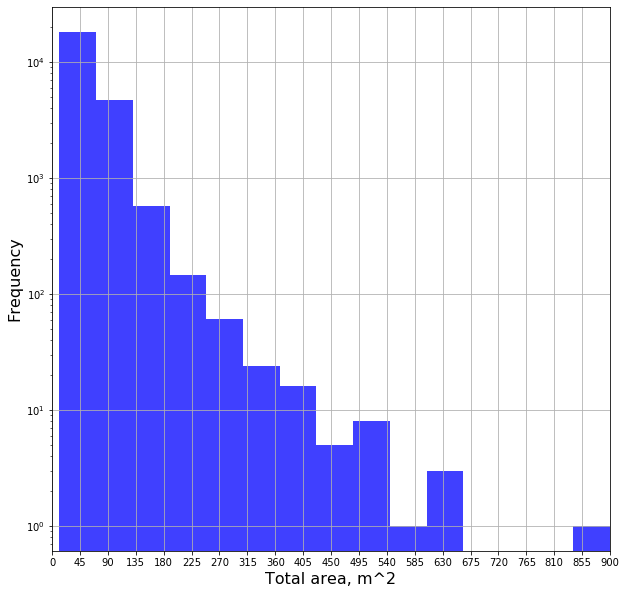

In [44]:
# гистограмма для общей площади квартир, тк разброс большой воспользуемся логорифмическим мастшабом
plt.figure(figsize=(10,10))
plt.hist(df_a['total_area'], bins=15,log=True,alpha=0.75, color='b') #density=True, facecolor='g', alpha=0.75
plt.grid()
plt.xlim(df_a['total_area'].quantile(0),df_a['total_area'].quantile(1))
plt.xticks(np.linspace(0,df_a['total_area'].quantile(1),21))
plt.xlabel('Total area, m^2',size=16)
plt.ylabel('Frequency', size=16)

In [45]:
df_a['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [46]:
print(df_a['total_area'].quantile(0.96))

125.0


Медианное значения для общей площади 52 м^2, первый и второй квантиль находятся в пределах 40 и 69 м^2, что соотвествует действительности рынка недвижимости (стандартный метраж для планировки квартир, наиболее оплтимальная и доступная), минимальная площадь при этом 12 м^2, что является нормой, потому что самое минимальное требование к жилой площади 9 м^2, предусмотренная жилищным кодексом РФ для квартир или домов (https://www.gov.spb.ru/gov/terr/reg_kalinin/zhilishnaya-politika/postanovka-na-uchet-grazhdan-v-kachestve-nuzhdayushihsya-v-zhilyh-pome/)

 - ОСновнвые значения, которые имеет смысл использовать для исследования находятся в переделах от 12 до 125 м^2, другие очень редко встречаются и скорее являются уникальным жильем, для которого общая оценка стоимости не подойдет.

Text(0, 0.5, 'Frequency')

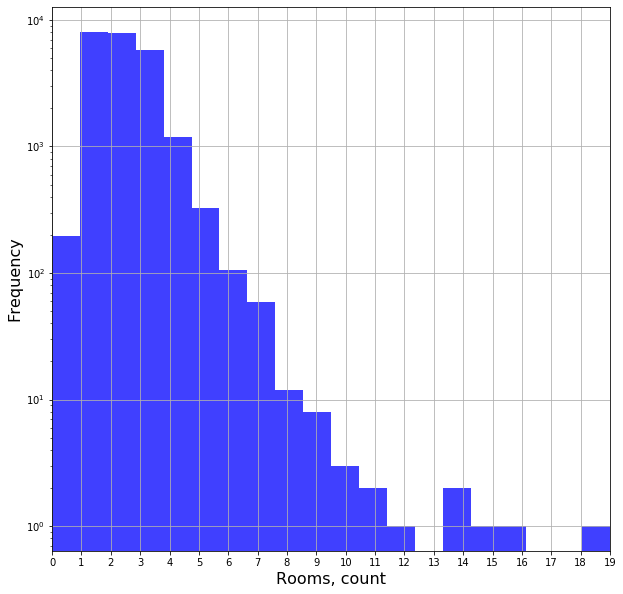

In [47]:
plt.figure(figsize=(10,10))
plt.hist(df_a['rooms'], bins=20,alpha=0.75,log=True, color='b') #density=True, facecolor='g', alpha=0.75
plt.grid()
plt.xlim(0,19)
plt.xticks(np.linspace(0,19,20))
plt.xlabel('Rooms, count', size=16)
plt.ylabel('Frequency', size=16)

In [48]:
df_a['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Медианное значения для количества комнат 2, первый и второй квантиль находятся в пределах от 1 до 3, минимальное значение равно 0, максимальное 19

 - Основные значения, которые будем рассматривать для исследования находятся в переделах от 1 до 5, значени 0 скорее всего является выбросом, использовать для аналитики его нельзя, другие очень редко встречаются и скорее являются уникальным жильем, для которого общая оценка не подойдет.

Text(0, 0.5, 'Frequency')

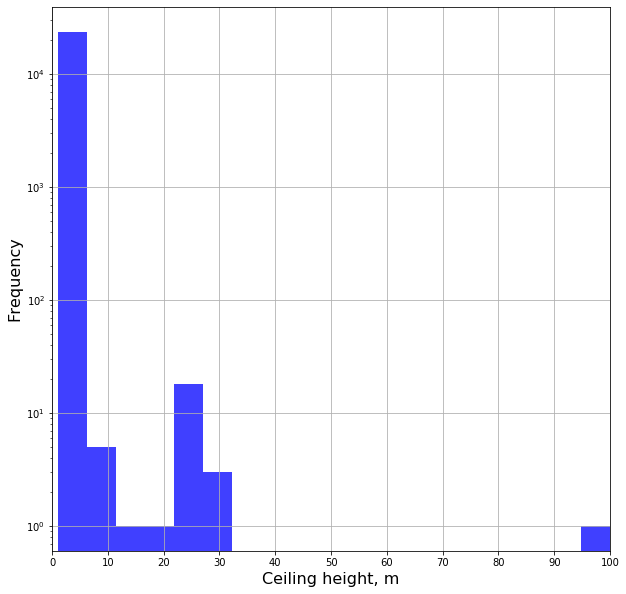

In [49]:
plt.figure(figsize=(10,10))
plt.hist(df_a['ceiling_height'],log=True, bins=19,alpha=0.75, color='b') #density=True, facecolor='g', alpha=0.75
plt.grid()
plt.xlim(0,100)
plt.xticks(np.linspace(0,df_a['ceiling_height'].max(),11))
plt.xlabel('Ceiling height, m', size=16)
plt.ylabel('Frequency', size=16)

In [50]:
df_a['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Медианное значения для высоты потолков 2.6 м, первый и второй квантиль находятся в пределах от 2.6 до 2.7, минимальное значение равно 1, максимальное 100

- Основнвые значения, которые будем рассматривать для исследования находятся в переделах от 2.4 до 3.4 метров, из открытых источников инфомации известно, что минимальная высота потолка может быть 2.4 метра, значени 1 и 100 скорее всего является выбросом, использовать для аналитики его нельзя, другие очень редко встречаются и скорее являются уникальным жильем, для которого общая оценка не подойдет.

Text(0, 0.5, 'Frequency')

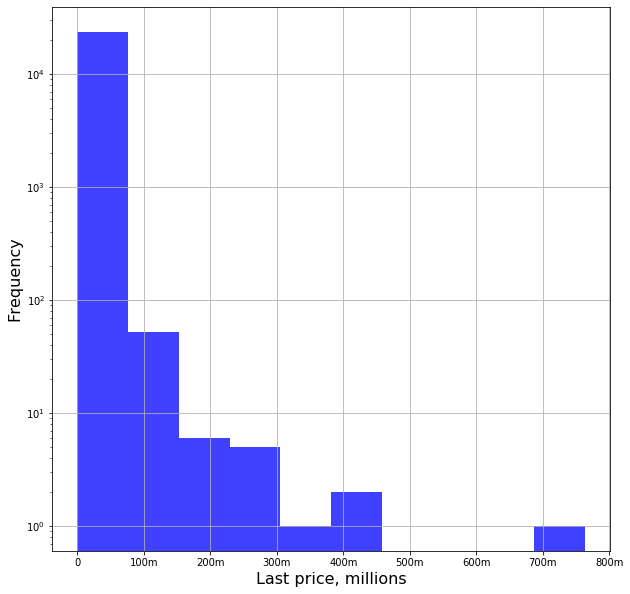

In [51]:
plt.figure(figsize=(10,10))
plt.hist(df_a['last_price'],log=True, bins=10,alpha=0.75, color='b') #density=True, facecolor='g', alpha=0.75
plt.grid()
tick_val = [0,100000000, 200000000, 300000000,400000000,500000000,600000000,700000000,800000000]
tick_lab = ['0','100m', '200m', '300m','400m', '500m', '600m','700m', '800m']
plt.xticks(tick_val,tick_lab)
plt.xlabel('Last price, millions', size=16)
plt.ylabel('Frequency', size=16)

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Обрати внимание, что наши действия начинают повторяться. 
    
То есть мы могли создать например фунцкию, которая будет строить необходимые нам графики.

</div>

In [52]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Медианное значения для стоимости 4,6 миллиона, первый и второй квантиль находятся в пределах от 3,4 до 6,8 миллионов, минимальное значение равно 12 тысячам, максимальное 763 миллиона
- Основнвые значения, которые будем рассматривать для исследования находятся в переделах от 1 до 10 миллионов, значени 12000 скорее всего является выбросом, использовать для аналитики его нельзя, другие очень редко встречаются и скорее являются уникальным жильем, для которого общая оценка не подойдет.

### Время продажи квартиры

Text(0, 0.5, 'Frequency')

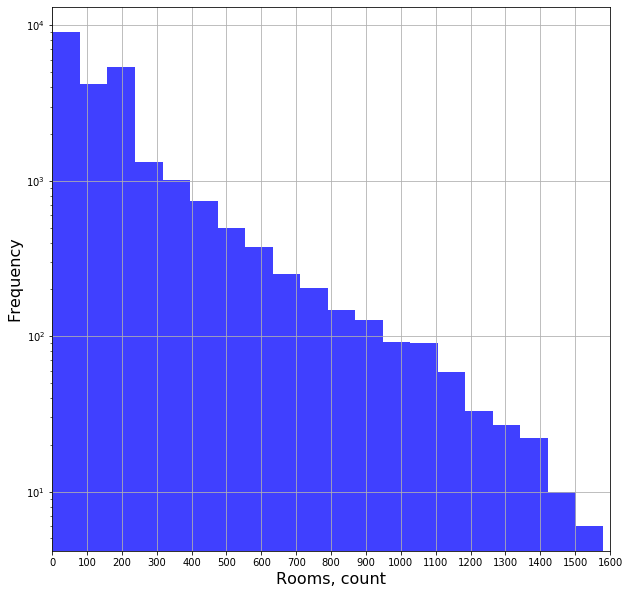

In [53]:
plt.figure(figsize=(10,10))
plt.hist(df_a['days_exposition'],log=True, bins=20,alpha=0.75,color='b') #density=True, facecolor='g', alpha=0.75
plt.grid()
plt.xlim(0,df_a['days_exposition'].max())
plt.xticks(np.linspace(0,1600,17))
plt.xlabel('Rooms, count', size=16)
plt.ylabel('Frequency', size=16)

In [54]:
df_a['days_exposition'].describe()

count    23699.000000
mean       180.769357
std        204.449917
min          1.000000
25%         45.000000
50%        124.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f46d9da7310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f46da2d8bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f46d9da72d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f46da2f2650>],
 'fliers': [],
 'means': []}

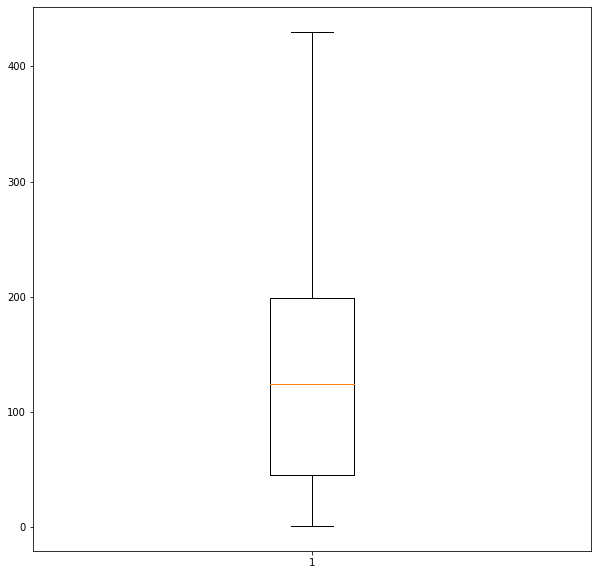

In [109]:
plt.figure(figsize=(10,10))
plt.boxplot(df_a['days_exposition'],showfliers=False)

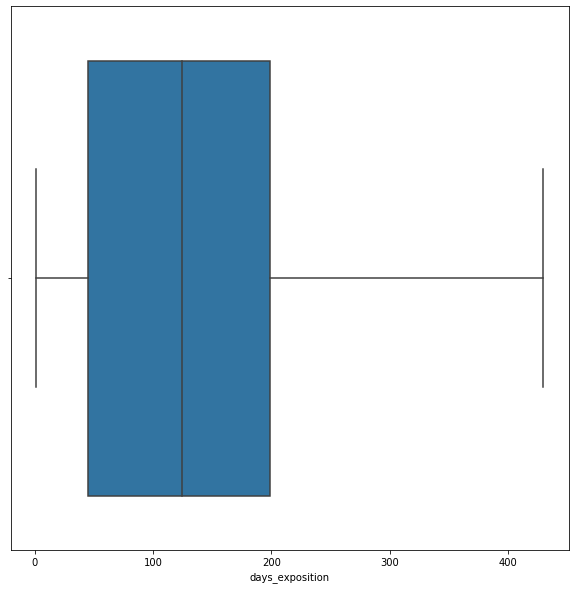

In [111]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df_a['days_exposition'],showfliers=False)

## Я написал функцию для графиков, но если честно не совсем понял, почему тебе это не понравилось, я целонаправленно игрался с каждым графиком, подбирал значения и тд, через функции так не сделать

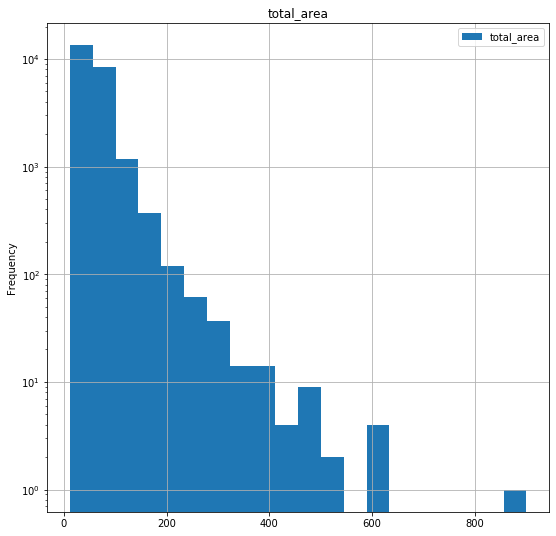

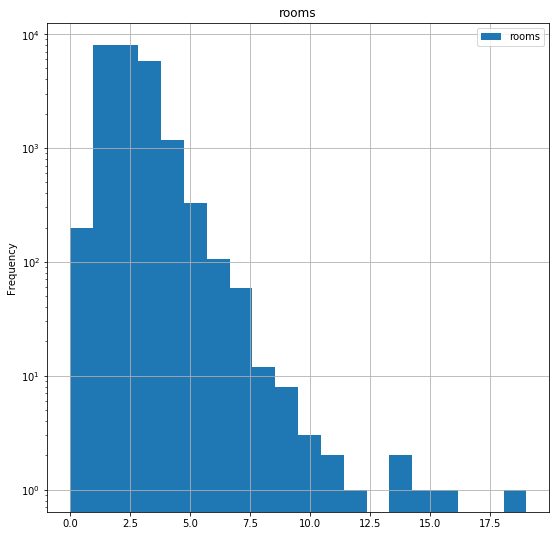

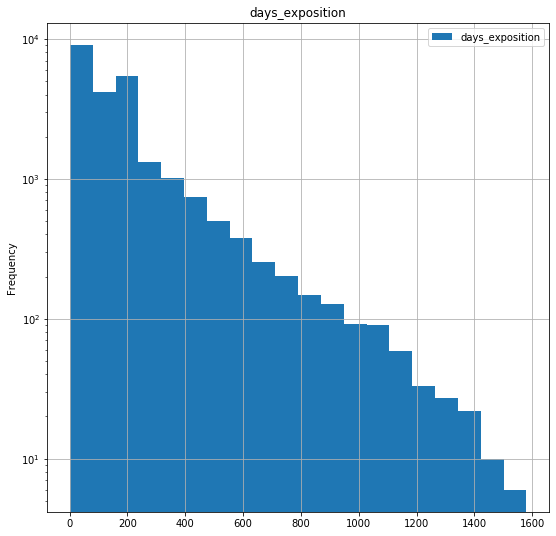

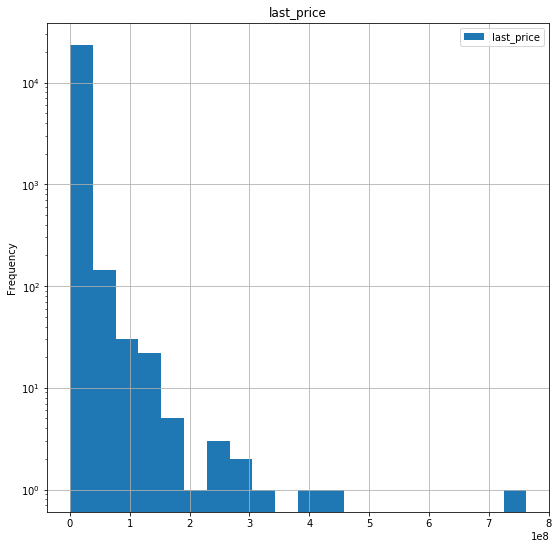

In [56]:
name = ['total_area','rooms','days_exposition', 'last_price']
for name in df[name]:
    df.plot(y=name,figsize=(9,9), kind='hist',title=name,log=True,grid=True, bins=20)

С учетом статистики из открытых источников, известно что в среднем жилье в Санкт-Петербурге, продается в течении 7-ми месяцев, что можно увидеть в нашем датасете, медианное значение равно 180 дням, это примерно 6 месяцев, в зависимости от уровня жилья и его стоимости, длительность продажи может значительно увеличиваться, но для адеватной оценки рынка в целом лучше использовать основные квантили, например меньше чем 45-ть дней уже кажется сомнительным, потому что жилье нужно подготовить для продажи,оформить документы, перевести вещи если это необходимо, наврядли и перывый же клиент захочет его у нас купить, только в исключительных ситуациях, поэтому определим, что значения до первого квантеля(>45) - это слишком быстрые продажи, значения после второго квантиля(200<) - это слишком долгие продажи и скорее всего связаны они с тем что жилье значительно дороже. 

## Обработка значений 

In [57]:
# сделаем срез по комнатам от 1 до 5
df_good = df[(df['rooms'] >= df['rooms'].quantile(0.25))&(df['rooms'] <= df['rooms'].quantile(0.98))]
good_rooms = df_good['rooms']

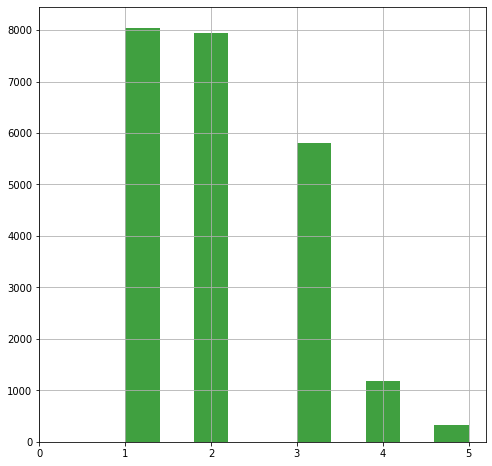

In [58]:
plt.figure(figsize=(8,8))
plt.hist(good_rooms,color='g',alpha=0.75)
plt.xticks(np.linspace(0,5,6))
plt.grid()

In [59]:
# больше всего объявлений с одной или двумя комнатами, чуть меньше с тремя
good_rooms.describe()

count    23307.000000
mean         2.047411
std          0.959638
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

In [60]:
# сделаем срез по высоте потолков от 2.4 метров до 3.4 метров
df_good = df_good[(df_good['ceiling_height'] >= df['ceiling_height'].quantile(0.001))&(df_good['ceiling_height'] <= df['ceiling_height'].quantile(0.98))]
good_ceiling_height = df_good['ceiling_height']    

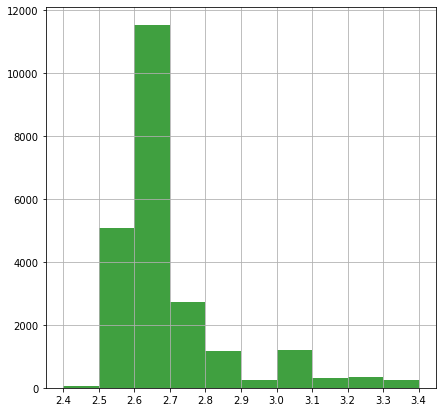

In [61]:
plt.figure(figsize=(7,7))
plt.hist(good_ceiling_height,color='g',alpha=0.75)
plt.xticks(np.linspace(2.4,3.4,11))
plt.grid()

In [62]:
# чаще всего высота потолков в квартирах на продажу в диапозоне от 2.6 до 2.7 метров
good_ceiling_height.describe()

count    22877.000000
mean         2.676431
std          0.161479
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.400000
Name: ceiling_height, dtype: float64

In [63]:
#сделаем срез по площади минимальное требование выполняется, поэтому выставим верхнюю границу до 120 квадратных метров
df_good = df_good[df_good['total_area'] <= df['total_area'].quantile(0.955)]
good_total_area = df_good['total_area']

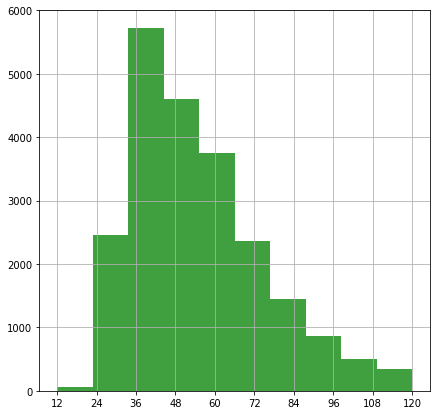

In [64]:
plt.figure(figsize=(7,7))
plt.hist(good_total_area,color='g',alpha=0.75)
plt.xticks(np.linspace(df['total_area'].min(),df['total_area'].quantile(0.955),10))
plt.grid()

In [65]:
# основные значения общей площади квартиры расположены 
# в диапозонах от 39 до 66 квадратных метров между основными квантилями
good_total_area.describe()

count    22111.000000
mean        54.826437
std         19.802716
min         12.000000
25%         40.000000
50%         50.500000
75%         66.000000
max        120.000000
Name: total_area, dtype: float64

In [66]:
# сделаем срез по ценовой категории, минимальную границу установим в 1,87 миллиона(самая низная цена квартиры в Питере), 
# тем самым избавимся от выбросов максимульную в 10 миллионов,
df_good = df_good[(df_good['last_price'] >= df['last_price'].quantile(0.05))&(df_good['last_price'] <= df['last_price'].quantile(0.885))]
good_last_price = df_good['last_price']

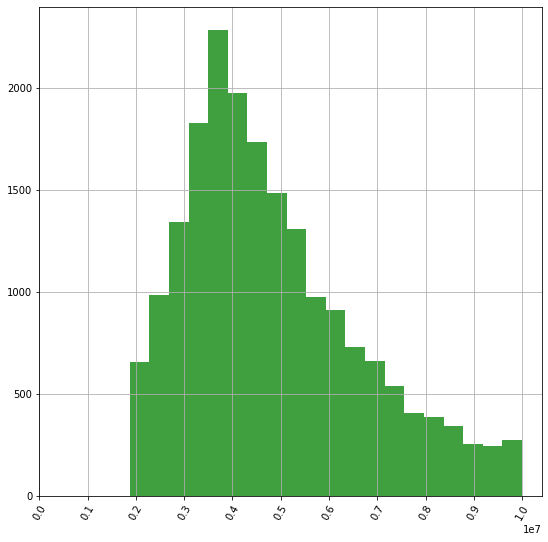

In [67]:
plt.figure(figsize=(9,9))
plt.hist(good_last_price,color='g',alpha=0.75, bins=20)

plt.xticks(np.linspace(0,df['last_price'].quantile(0.885),11),rotation=60)
plt.grid()

In [68]:
# цены сконцентрированны в диапозоне от 3 миллионов до 6 миллионов
df_good['last_price'].describe()

count    1.933300e+04
mean     4.833400e+06
std      1.821544e+06
min      1.870000e+06
25%      3.500000e+06
50%      4.500000e+06
75%      5.900000e+06
max      1.000000e+07
Name: last_price, dtype: float64

## Оценка влияния различных факторов на стоимость недвижимости

Для анализа данных, нам необходимо изучить 6 зависимостей разделим их на три группы, 
- первая(по признаку размера недвижимости): число комнат, площадь 
- вторая(по признаку расположения недвижемости): удаленность от центра, этаж; 
- третья(по признаку даты выставления на продажу): день,неделя, месяц выставления на продажу

In [69]:
#рассмотрим первую группу
group_analitic_first = ['last_price','total_area', 'rooms']

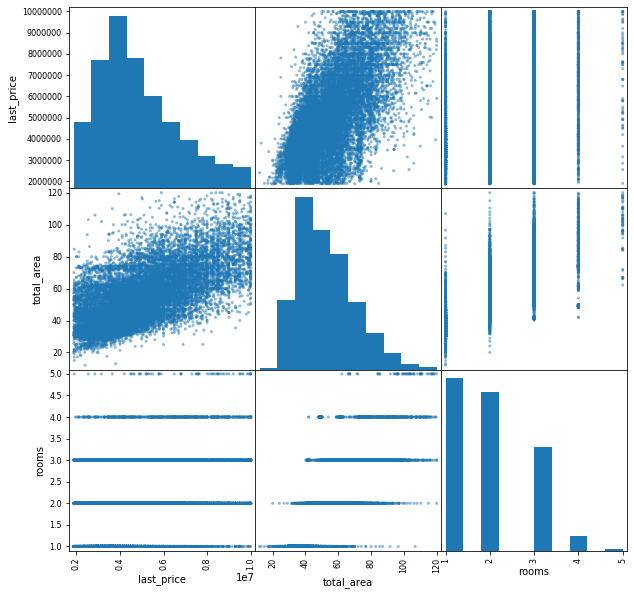

In [112]:
pd.plotting.scatter_matrix(df_good[group_analitic_first], figsize=(10, 10));

Text(0.5, 1, 'Matrix correlation')

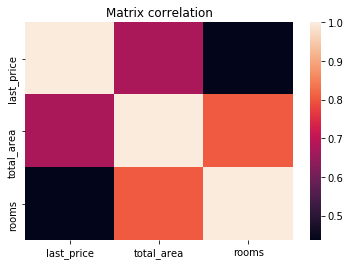

In [71]:
sns.heatmap(df_good[group_analitic_first].corr())
plt.title('Matrix correlation')

По построенным матрицам распределения, можно сделать вывод, что цена недвижимости зависит от общей площади, при этом от количества комнат зависимость менее выраженная меньше 0,5, это связанно с тем что площадь комнат может быть разной и одна комната по площади может быть больше чем три.

In [72]:
#рассмотрим вторую группу
group_analitic_second = ['last_price','cityCenters_nearest', 'floor']

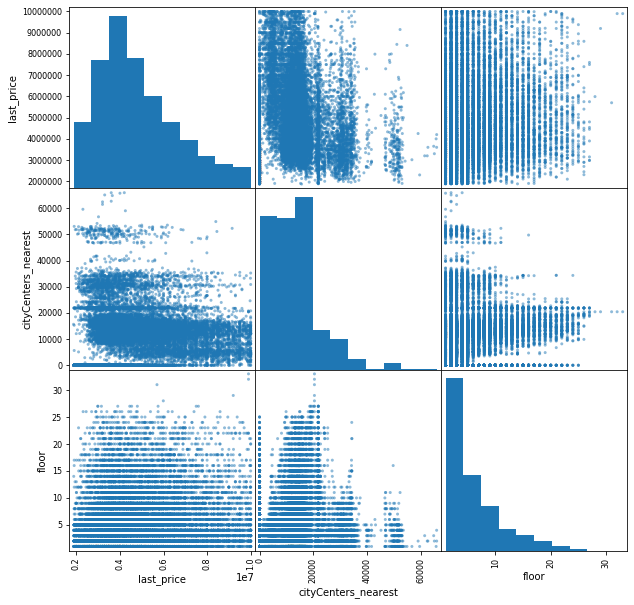

In [113]:
pd.plotting.scatter_matrix(df_good[group_analitic_second], figsize=(10, 10));

Text(0.5, 1, 'Matrix correlation')

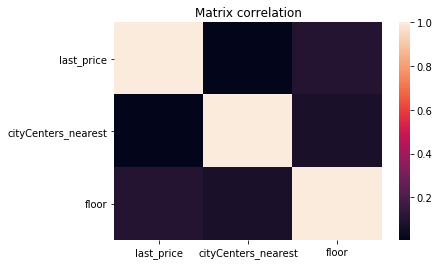

In [74]:
sns.heatmap(df_good[group_analitic_second].corr())
plt.title('Matrix correlation')

In [75]:
# создадим сводную таблицу для оценки зависимости категоризации этажа
pivot_category_floor=(df_good
                      .pivot_table(index='category_floor', values='last_price')
                      )
display(pivot_category_floor)

,last_price
category_floor,
Другой,4.945901e+06
Первый,4.379538e+06
Последний,4.623026e+06


Из анализа сводной таблицы можно сделать вывод, что расположение этажа квартиры значительно на ценообразование не влияет.
Оценить влияние удаленности от центра сложно, потому что было мало данных, значение очень близко к нулю, но имеет отрицательный характер из чего можно предположить, что такая зависимость есть.

In [76]:
#рассмотрим третью группу
group_analitic_third = ['last_price','day_of_week_exposition','month_exposition', 'year_exposition']

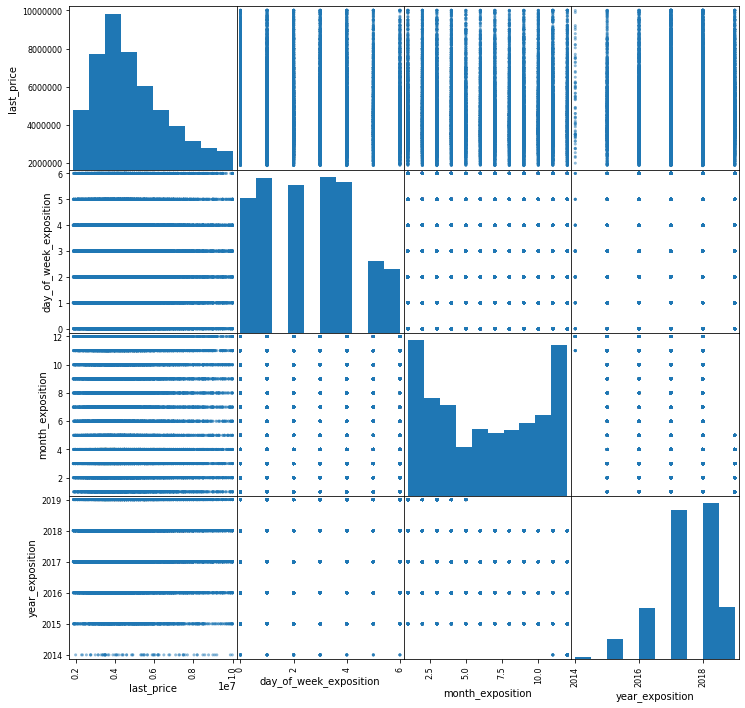

In [114]:
pd.plotting.scatter_matrix(df_good[group_analitic_third], figsize=(12, 12));

Text(0.5, 1, 'Matrix correlation')

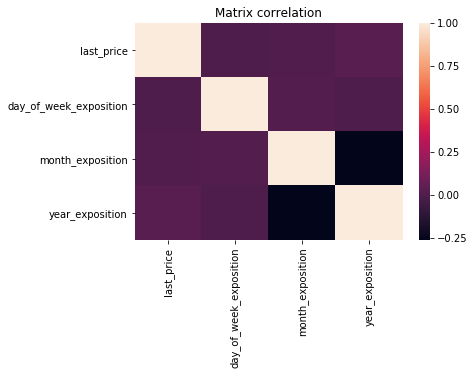

In [78]:
# коэф. корреляции
sns.heatmap(df_good[group_analitic_third].corr())
plt.title('Matrix correlation')

In [79]:
# сводная таблица по годам
df_good.pivot_table(index=['year_exposition'], values='last_price')
                      

,last_price
year_exposition,
2014,5.381891e+06
2015,5.044466e+06
2016,4.745600e+06
2017,4.741470e+06
2018,4.814247e+06
2019,5.139539e+06


In [80]:
# сводная таблица по дням 
df_good.pivot_table(index=['day_of_week_exposition'], values='last_price')

,last_price
day_of_week_exposition,
0,4.837402e+06
1,4.824959e+06
2,4.855517e+06
3,4.827743e+06
4,4.826494e+06
5,4.847555e+06
6,4.808579e+06


In [81]:
# сводная таблица по месяцам
df_good.pivot_table(index=['month_exposition'], values='last_price')

,last_price
month_exposition,
1,4.864806e+06
2,4.827815e+06
3,4.800232e+06
4,4.947944e+06
5,4.821027e+06
6,4.693076e+06
7,4.852643e+06
8,4.816791e+06
9,4.788616e+06


In [82]:
df_good = df_good.reset_index(drop=True)

Из полученных данных можно выделить, незначительную зависимость цены недвижимости от года размещения объявления, начиная с 2014 цена падала, но после 2017 начала снова расти, при этом наибольшая средняя цена была отмечена в 2014 году, скорее всего это было связанно с изменением валютного курса и увеличением спроса на покупку жилья. От дня недели и месяца размещения объявления, зависимость цены не наблюдается.

## Оценка средней стоимости квадратного метра в зависимости от расположения

In [83]:
# выведем топ10 локаций и оценим стоимость квадратного метра в каждой
top_location = list(df_good['locality_name'].value_counts().head(10).index)

In [84]:
df_good.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19333 entries, 0 to 19332
Data columns (total 29 columns):
total_images              19333 non-null int64
last_price                19333 non-null float64
total_area                19333 non-null float64
first_day_exposition      19333 non-null datetime64[ns]
rooms                     19333 non-null int64
ceiling_height            19333 non-null float64
floors_total              19333 non-null int64
living_area               19333 non-null float64
floor                     19333 non-null int64
is_apartment              19333 non-null bool
studio                    19333 non-null bool
open_plan                 19333 non-null bool
kitchen_area              19333 non-null float64
balcony                   19333 non-null int64
locality_name             19295 non-null object
airports_nearest          19333 non-null int64
cityCenters_nearest       19333 non-null int64
parks_around3000          19333 non-null int64
parks_nearest             19

In [85]:
pivot_locality = (df_good.query('locality_name in @top_location')
.pivot_table(index='locality_name',values='price_per_sq_meter', aggfunc=('max','min','mean'))
.sort_values(by='max', ascending=False))
display(pivot_locality)

,max,mean,min
locality_name,,,
Санкт-Петербург,312240.000000,104266.456675,26250.000000
Пушкин,166666.666667,100142.752988,59836.065574
деревня Кудрово,142857.142857,92210.740409,54160.346696
поселок Мурино,138580.246914,85215.513993,50000.000000
поселок Парголово,138522.427441,90559.754577,48405.466970
поселок Шушары,134000.000000,78382.571887,47700.416089
Всеволожск,133333.333333,67292.044719,38226.299694
Гатчина,130853.994490,69755.093704,38696.537678
Колпино,118694.362018,75221.876295,47957.371226


<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Рекомендую не применять метод `print()` для вывода таблиц. Лучше импортировать в
начале проекта метод `display` из библиотеки `IPython.display` и
применять его:

---
    
`from IPython.display import display`

`display(df)`

    
</div>

Самая дорогая недвижмость в Санкт-Петербурге, максимальное значение достигает 312 тыс. за квадратный метр, при этом можно найти жилье за 26 тысяч за квадратный метр, связанно это скорее всего с очень низним метражом и как правило такой вид недвижимости, как апартоменты в большой степени представлен в столице, цена на которую значительно ниже обычной, при этом средняя цена так же остается самой высокой в сравнении с другими населенными пунктами.

Самая дешевая ценовая категория представлена в Выборге.


## Оценка недвижимости в Санкт-Петербурге

In [86]:
# Срез по недвижимости в Санкт-Петербурге
df_piter = df_good.query('locality_name == "Санкт-Петербург"').reset_index(drop=True)

In [87]:
df_piter['locality_name'].value_counts()

Санкт-Петербург    12782
Name: locality_name, dtype: int64

In [88]:
# округлим до километров, округли и приведем к формату int
km = 1000
df_piter['cityCenters_nearest_km'] = np.round(df_piter['cityCenters_nearest']/km).astype('int')

In [89]:
print(df_piter.head(10))
df_piter['cityCenters_nearest_km'].dtype

   total_images  last_price  total_area first_day_exposition  rooms  \
0            10   5196000.0        56.0           2015-08-20      2   
1             2  10000000.0       100.0           2018-06-19      2   
2             5   7915000.0        71.6           2019-04-18      2   
3            18   5400000.0        61.0           2017-02-26      3   
4             5   5050000.0        39.6           2017-11-16      1   
5            16   4650000.0        39.0           2017-11-18      1   
6            11   6700000.0        82.0           2017-11-23      3   
7             6   4180000.0        36.0           2016-09-09      1   
8             8   3250000.0        31.0           2017-01-27      1   
9            13   3200000.0        31.6           2018-03-14      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.65             5         34.0      4         False  ...   
1            3.03            14         32.0     13         False  ...

dtype('int64')

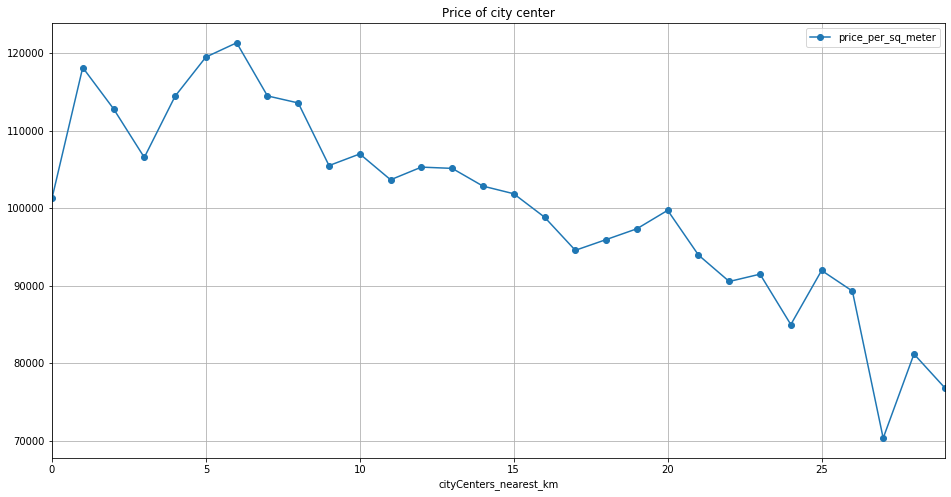

In [90]:
city_center_per_sq_price = (df_piter.pivot_table(index = 'cityCenters_nearest_km', values='price_per_sq_meter')
                    .plot(grid=True,title='Price of city center',style='o-', figsize=(16,8)))

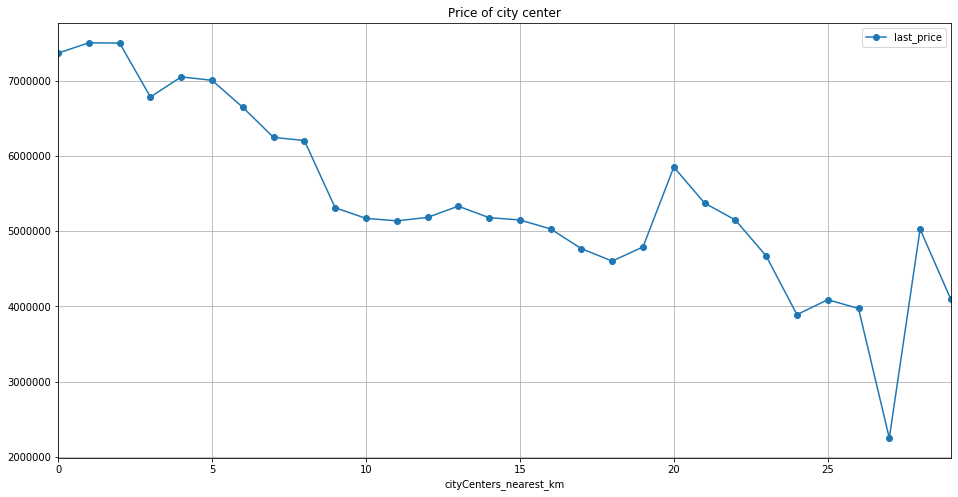

In [91]:
city_center_total_price = (df_piter.pivot_table(index = 'cityCenters_nearest_km', values='last_price')
                    .plot(grid=True,title='Price of city center',style='o-', figsize=(16,8)))

In [92]:
# Из полученных графиков, видно что после 7 км от центра цена начинает значительно падать, обозначим эту область центральной
df_piter_center = df_piter.query('cityCenters_nearest_km <= 7').reset_index(drop=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Ориентировочно это и есть наша граница, за которую мы будем принимать как центр. 

</div>

In [93]:
# изучим параметры эти же параметры в отношении квартир в Питере в центре.
features = [
    'last_price',
    'total_area',
    'rooms',
    'ceiling_height',
]

In [94]:
df_piter_center[features].describe()

,last_price,total_area,rooms,ceiling_height
count,1.816000e+03,1816.000000,1816.000000,1816.000000
mean,6.870630e+06,62.044967,2.226872,2.818877
std,1.740210e+06,20.051022,0.941404,0.234731
min,1.900000e+06,12.000000,1.000000,2.400000
25%,5.599000e+06,46.000000,2.000000,2.650000
50%,6.850000e+06,60.000000,2.000000,2.700000
75%,8.260000e+06,75.650000,3.000000,3.000000
max,1.000000e+07,120.000000,5.000000,3.400000


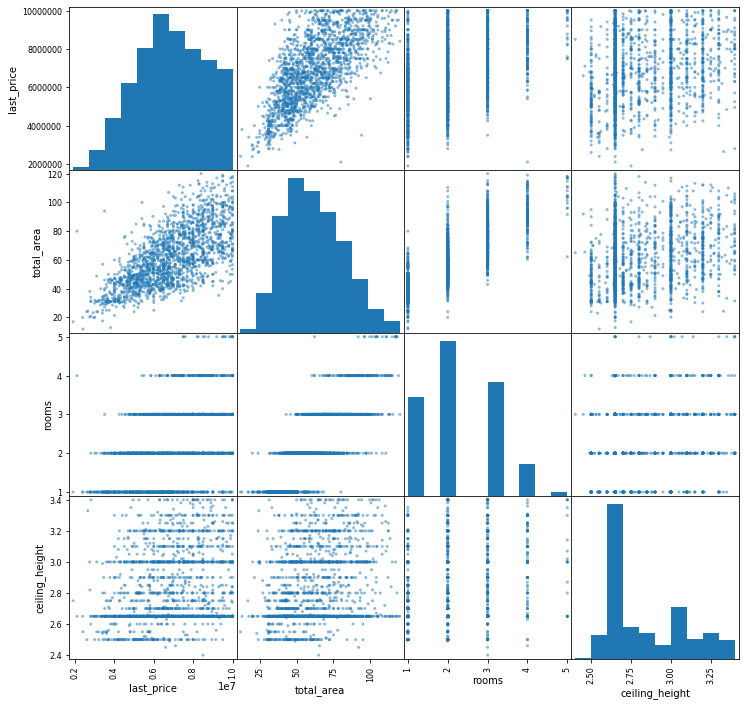

In [115]:
pd.plotting.scatter_matrix(df_piter_center[features], figsize=(12, 12));

<div class="alert alert-danger">
<h2> Комментарий ревьюера</h2>

Давай постараемся автоматизировать построение графиков через цикл `for`. 
    
Почему это важно? 
    
- экономим своё время
- оптимизируем код
- делаем работу презентабельнее
    
Выбери любой участок кода где это сделать целесообразнее всего. 

</div>
**СДЕЛАЛ**

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Хорошо, что получилось автоматизировать построение графиков. Теперь в нужный момент мы сможем внедрить этот инструмент. 
    
    
</div>

Text(0.5, 1, 'Matrix correlation')

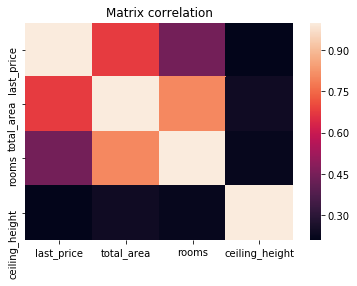

In [96]:
sns.heatmap(df_piter_center[features].corr())
plt.title('Matrix correlation')

In [97]:
# создадим сводную таблицу для оценки зависимости категоризации этажа
df_piter_center.pivot_table(index='category_floor', values='last_price')

,last_price
category_floor,
Другой,7.040284e+06
Первый,6.109883e+06
Последний,6.877572e+06


В центре города различие цены в зависимости от этажа довольно значительная, первый этаж дешевле, другого или последнего

In [98]:
# сводная таблица по годам
df_piter_center.pivot_table(index=['year_exposition'], values='last_price')

,last_price
year_exposition,
2014,6.890000e+06
2015,6.879814e+06
2016,6.984276e+06
2017,6.782416e+06
2018,6.851436e+06
2019,7.069595e+06


In [99]:
# сводная таблица по месяцам
df_piter_center.pivot_table(index=['month_exposition'], values='last_price') 

,last_price
month_exposition,
1,7.034990e+06
2,7.002593e+06
3,6.900372e+06
4,6.840113e+06
5,6.834087e+06
6,6.699972e+06
7,7.085412e+06
8,6.518720e+06
9,6.859862e+06


In [100]:
# сводная таблица по дням
df_piter_center.pivot_table(index=['day_of_week_exposition'], values='last_price') 

,last_price
day_of_week_exposition,
0,6.782589e+06
1,6.781925e+06
2,6.816952e+06
3,6.783466e+06
4,7.097637e+06
5,6.817625e+06
6,7.230136e+06


In [101]:
df_piter_center.pivot_table(index=['cityCenters_nearest_km'], values='last_price') 

,last_price
cityCenters_nearest_km,
0,7.365000e+06
1,7.502408e+06
2,7.497762e+06
3,6.782515e+06
4,7.049397e+06
5,7.003906e+06
6,6.644939e+06
7,6.245183e+06


### Вывод
Цены в центре города, **отличаются** от цен в целом по `городу` следующими параметрами:
- Цена по месяцаам и дням недели меняется значительно чаще, но при этом по годам более стабильна, связано это скорее всего с курсом валют
- Удаленность от центра может влиять на ценообразование, но не так значительно как в более удаленных районах
- Расположение этажа в отличии от общей статистики так же оказывает влияние на ценообразование в центре города, первые этажи дешевле, в то время как другие этажи дороже, скорее всего это связано с уровнями шума

### Шаг 5. Общий вывод

- Ценообразование впервую очередь зависит от общей площади недвижимости, комнаты могут быть совершенно разных размеров
- Ценообразование зависит от расположения недвижимости
- Ценоообразование в центре города может отличаться в сравнии с оценкой по всему городу
- Цена недвижимости может меняться со временем в зависимости от экономической ситуации и спроса на рынке


<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Вывод логичен и понятен. 
    
В том числе было бы здорово разбавить его с помощью выявленных фактов. 

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>
    
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
Не стоит забывать про оформление своей работы, это важный такой же важный этап. Рекомендую «не стесняться» использовать ячейки типа **markdown** там где нам необходимо отобразить свои размышления, в том числе с использованием дополнительной стилизации.
    
Успехов тебе в новых проектах! 
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Рекомендую посмотреть на дополнительную стилизацию ячеек типа **markdown**.
    
**Жирный**
*Курсив*
    
--- 

# Заголовок первого уровня

--- 
    
## Заголовок первого уровня
  
---  
Списки:
    
- один 
- два
- три
   
---
    
1. Раз
2. Раз раз
3. Раз два три
    
--- 
    
Отображение `переменных`
    
    
</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод